# Prepare a model for glass classification using KNN

Data Description:

* RI : refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* AI: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron

Type: Type of glass: (class attribute)

1. --building_windows_float_processed
2. --building_windows_non_float_processed
3. --vehicle_windows_float_processed
4. --vehicle_windows_non_float_processed (none in this database)
5. --containers
6. --tableware
7. --headlamps

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
glass=pd.read_csv("F:/ExcelR workings/Assignments/KNN/glass.csv")

In [3]:
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
Glass=glass.copy()

In [7]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

### Normalize the data

In [9]:
from sklearn.preprocessing import scale

In [12]:
x=scale(glass.iloc[:,:-1])
y=glass.iloc[:,-1]

In [13]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## Splitting the data into train and test data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3, random_state=44)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((149, 9), (65, 9), (149,), (65,))

# Model Building

In [61]:
model1 =KNeighborsClassifier(n_neighbors=10)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

#### Accuracy on train data

In [62]:
np.mean((model1.predict(x_train)==y_train))

0.6577181208053692

#### Accuracy on test data

In [63]:
np.mean(model1.predict(x_test)==y_test)

0.6307692307692307

## Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
n_neighbors=np.array(range(1,20,2))
param_grid=dict(n_neighbors=n_neighbors)

In [47]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [48]:
print(grid.best_score_)
print(grid.best_params_)

0.7112643678160919
{'n_neighbors': 1}


In [49]:
from sklearn.metrics import accuracy_score

In [66]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_=accuracy_score(y_test,y_pred)
print("Accuracy = ",acc_)

Accuracy =  0.7384615384615385


# Plot
* Train accuracy plot
* Test accuracy plot

In [58]:
import matplotlib as plt

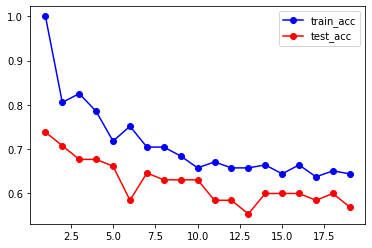

In [59]:
acc=[]
for i in range(1,20):
    model2=KNeighborsClassifier(n_neighbors=i)
    model2.fit(x_train,y_train)
    train_acc = np.mean(model2.predict(x_train)==y_train)
    test_acc = np.mean(model2.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])
    
import matplotlib.pyplot as plt

##training accuracy plot
plt.plot(np.arange(1,20),[i[0] for i in acc],"bo-")

##test accuracy plot
plt.plot(np.arange(1,20),[i[1] for i in acc],"ro-")    

plt.legend(["train_acc", "test_acc"])

## Maximum Accuracy according to grid search is 'n_neighbors' value at '1' but where errors possibility is less according to plot that is on '10'.